# Global mean Sea Surface Temperatures

In [1]:
import numpy as np
import xarray as xr
import pandas as pd

from calendar import monthrange

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.dates import DateFormatter

import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature

from shapely.geometry import Polygon, Point
from shapely.ops import transform
import pyproj

from globales import *
plt.rcParams['figure.figsize'] = (10, 4)

In [2]:
from dask.distributed import Client, LocalCluster
cluster = LocalCluster(n_workers=26, threads_per_worker=1)
client = Client(cluster)

/opt/conda/envs/ocean/lib/python3.11/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 35155 instead
  warnings.warn(


In [3]:
client.dashboard_link

'http://127.0.0.1:35155/status'

## Load data

In [4]:
base_file = GlobalSU['DatPath'] + '/Satelite/MUR/NC/'

In [5]:
year1= 2003
year2= 2024
files = []
for iy in range(year1,year2+1):
    for im in range(1,13):
        for id in range(1,monthrange(iy,im)[1]+1):
            files.append(base_file+"%04d%02d%02d090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc"%(iy,im,id))

In [ ]:
def drop_coords(ds):
    ds = ds.get(['analysed_sst'])
    return ds.reset_coords(drop=True)

DS = xr.open_mfdataset(files,combine='nested', 
                            concat_dim="time", parallel=True, combine_attrs= "drop", preprocess=drop_coords,autoclose = True, data_vars='minimal', coords="minimal")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/conda/envs/ocean/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3667, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_2867893/2183807786.py", line 5, in <module>
    DS = xr.open_mfdataset(files,combine='nested',
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/envs/ocean/lib/python3.11/site-packages/xarray/backends/api.py", line 1064, in open_mfdataset
    datasets, closers = dask.compute(datasets, closers)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/envs/ocean/lib/python3.11/site-packages/dask/base.py", line 654, in compute
    dsk = collections_to_dsk(collections, optimize_graph, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/envs/ocean/lib/python3.11/site-packages/dask/base.py", line 427, in collections_to_dsk
    dsk = opt(dsk, keys, **kwargs)
          ^^^^^^^^^^^^^^^^^^^

2025-05-19 08:29:01,890 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
2025-05-19 08:29:01,895 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
2025-05-19 08:29:01,895 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
2025-05-19 08:29:01,896 - distributed.nanny - ERROR - Worker process died unexpectedly
2025-05-19 08:29:01,896 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
Traceback (most recent call last):
Process Dask Worker proces

In [ ]:
sst=DS.analysed_sst.sel(lon=slice(-35,0),lat=slice(10,47))-273.15

In [ ]:
sstp=sst[-1,:,:].load()

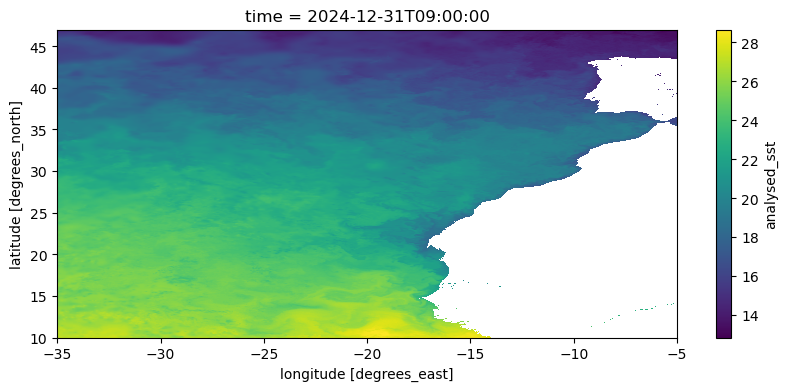

In [ ]:
sstp.plot()

2025-05-16 14:21:53,181 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2025-05-16 14:22:00,778 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2025-05-16 14:22:07,572 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2025-05-16 14:22:15,316 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2025-05-16 14:22:23,626 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2025-05-16 14:22:31,438 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2025-05-16 14:22:42,939 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2025-05-16 14:22:51,649 - distributed.utils_perf - WARNING - full garbage collections took

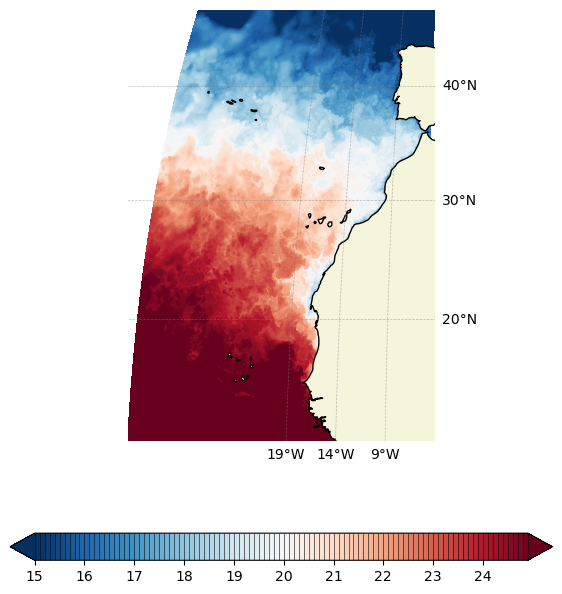

In [ ]:
fig= plt.figure(figsize=(14,8))

ax = plt.axes(projection=ccrs.Mollweide(),frameon=False)
ax.patch.set_visible(False)

land = cartopy.feature.NaturalEarthFeature('physical', 'land', 
                        edgecolor='k', 
                        scale = '50m' ,facecolor=cfeature.COLORS['land'])
ax.add_feature(land, facecolor='beige')
        
cm=ax.contourf(sstp.lon,sstp.lat,sstp, levels=np.arange(15,25,0.1), 
               transform=ccrs.PlateCarree(),
               cmap = plt.cm.RdBu.reversed(),
               vmin = 15,vmax = 25,extend='both')

gridlines=ax.gridlines(draw_labels=True, linewidth=.5,color='gray', alpha=0.5, linestyle='--',x_inline=False, y_inline=False)
gridlines.ylocator = mticker.FixedLocator([20, 30, 40])
gridlines.xlocator = mticker.FixedLocator([-19, -14, -9])
gridlines.left_labels = False
gridlines.top_labels = False

cbar=fig.colorbar(cm,ax=ax, location='bottom',shrink=.5, drawedges=True)



In [ ]:
sst_re = sst.chunk({"time":8036, "lat":10, "lon":100})

In [ ]:
sst_re

<xarray.DataArray 'analysed_sst' (time: 8036, lat: 3701, lon: 3501)> Size: 833GB
dask.array<rechunk-merge, shape=(8036, 3701, 3501), dtype=float64, chunksize=(8036, 10, 100), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 64kB 2003-01-01T09:00:00 ... 2024-12-31T09...
  * lat      (lat) float32 15kB 10.0 10.01 10.02 10.03 ... 46.98 46.99 47.0
  * lon      (lon) float32 14kB -35.0 -34.99 -34.98 -34.97 ... -0.02 -0.01 0.0

In [ ]:
z=sst_re.polyfit('time',deg=1).compute() 

/opt/conda/envs/ocean/lib/python3.11/site-packages/xarray/core/dataset.py:5195: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explicitly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  stacked_var = exp_var.stack(**{new_dim: dims})
/opt/conda/envs/ocean/lib/python3.11/site-packages/distributed/client.py:3164: UserWarning: Sending large graph of size 59.34 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
2025-05-16 16:17:53,476 - distributed.worker - ERROR - failed during get data with tcp://127.0.0.1:46341 -> tcp://127.0

In [ ]:
Slope=z.polyfit_coefficients[0,:,:]/1.e-9*24*3600*365*100
Slope

<xarray.DataArray 'polyfit_coefficients' (lat: 3701, lon: 3501)> Size: 104MB
array([[2.88383765, 2.87265137, 2.86681464, ...,        nan,        nan,
               nan],
       [2.88110922, 2.86883223, 2.86281924, ...,        nan,        nan,
               nan],
       [2.87690044, 2.86440088, 2.85852018, ...,        nan,        nan,
               nan],
       ...,
       [2.98818821, 2.98441678, 2.98228963, ...,        nan,        nan,
               nan],
       [2.98287253, 2.97851409, 2.97553745, ...,        nan,        nan,
               nan],
       [2.9771543 , 2.97267248, 2.96893106, ...,        nan,        nan,
               nan]])
Coordinates:
  * lat      (lat) float32 15kB 10.0 10.01 10.02 10.03 ... 46.98 46.99 47.0
  * lon      (lon) float32 14kB -35.0 -34.99 -34.98 -34.97 ... -0.02 -0.01 0.0
    degree   int64 8B 1

In [ ]:
Slope.to_netcdf('./data2/TendenciasMUR_IBICAN.nc')

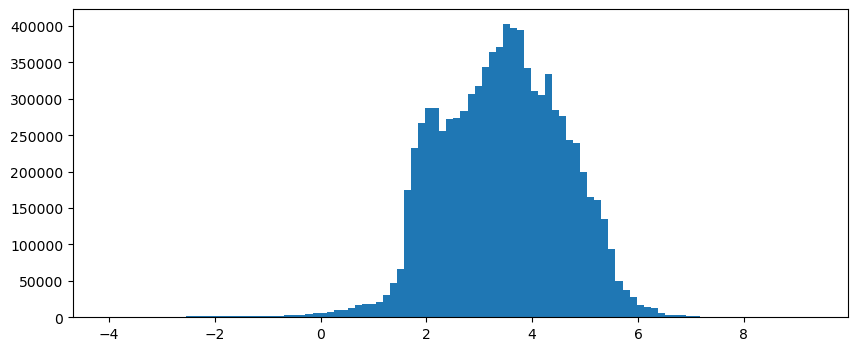

In [ ]:
plt.hist(Slope.values.flatten(),bins=100);

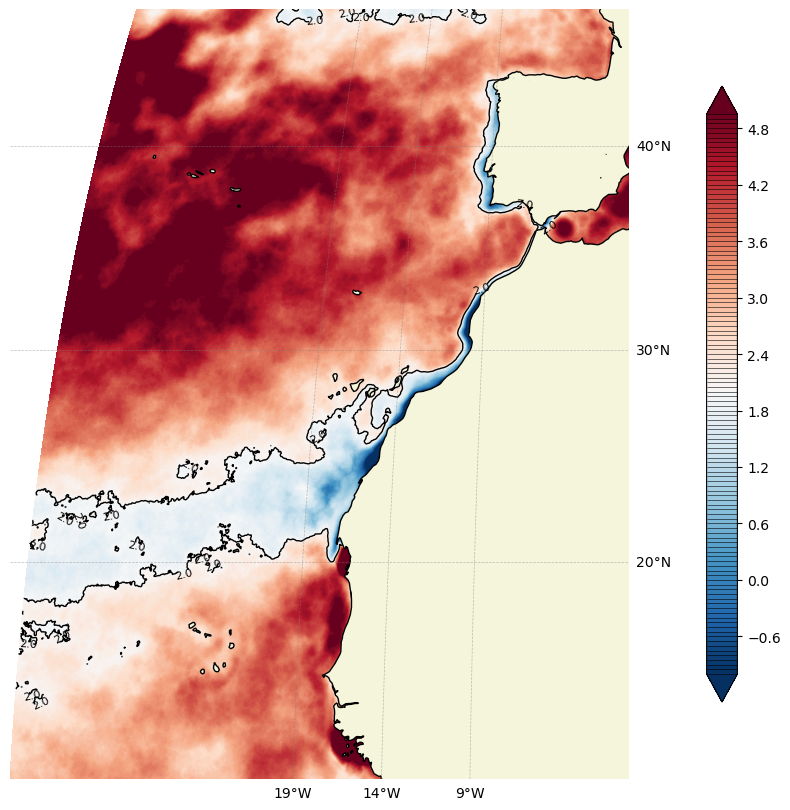

In [ ]:
fig= plt.figure(figsize=(20,10))

ax = plt.axes(projection=ccrs.Mollweide(),frameon=False)
ax.patch.set_visible(False)

land = cartopy.feature.NaturalEarthFeature('physical', 'land', edgecolor='k', scale = '50m' ,
            facecolor=cfeature.COLORS['land'])
ax.add_feature(land, facecolor='beige')
        
cm=ax.contourf(Slope.lon,Slope.lat,Slope, 
               levels=np.arange(-1,5,0.05), 
               transform=ccrs.PlateCarree(),
               cmap = plt.cm.RdBu.reversed(),
               vmin = -1,vmax = 5,extend='both')

contour_lines = ax.contour(Slope.lon, Slope.lat, Slope,
                           levels=[2],  # Adjust the step size for isolines
                           colors='black', linewidths=1,
                           transform=ccrs.PlateCarree())

ax.clabel(contour_lines, inline=True, fontsize=8, fmt="%1.1f")

Gd=ax.gridlines(draw_labels=True, linewidth=.5,color='gray', alpha=0.5, linestyle='--',x_inline=False, y_inline=False)
Gd.ylocator = mticker.FixedLocator([20, 30, 40])
Gd.xlocator = mticker.FixedLocator([-19, -14, -9])
Gd.left_labels = False
Gd.top_labels = False

cbar=fig.colorbar(cm,ax=ax,shrink=.8, drawedges=True,location='right')

In [ ]:
Gd.xlocator = mticker.FixedLocator([-30, -20, -10, 0])

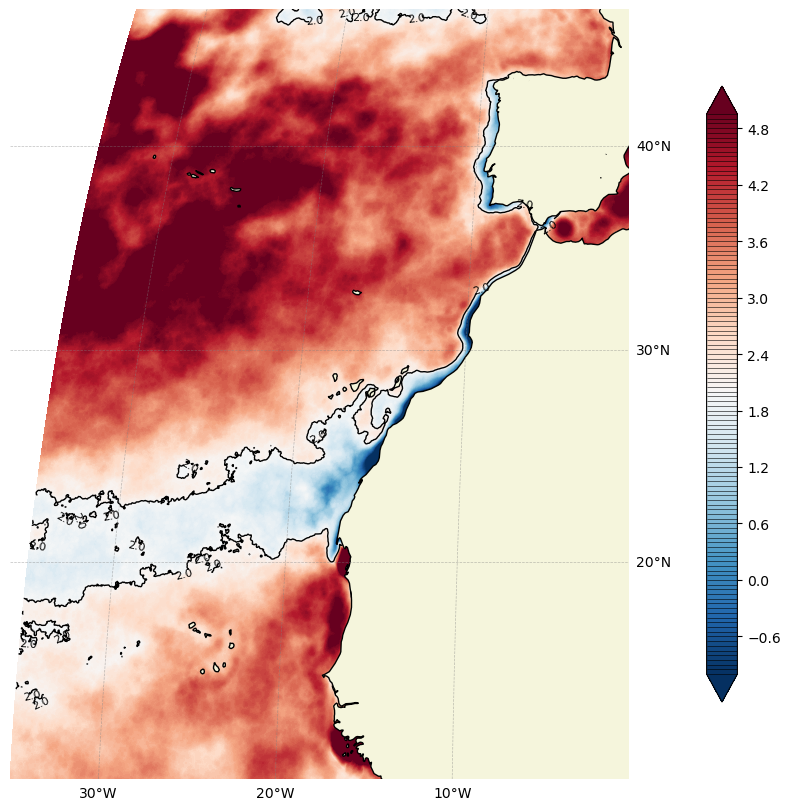

In [ ]:
fig